In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving PDD.csv to PDD.csv


In [ ]:
PDD = pd.read_csv("PDD.csv")
PDD

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-14,32.599998,33.099998,32.450001,32.840000,32.840000,2810500
1,2019-10-15,33.189999,34.099998,33.060001,33.939999,33.939999,5954300
2,2019-10-16,33.689999,34.189999,33.630001,33.740002,33.740002,2957300
3,2019-10-17,33.820000,34.490002,33.639999,34.200001,34.200001,3624500
4,2019-10-18,34.220001,34.639999,32.700001,33.380001,33.380001,4510700
...,...,...,...,...,...,...,...
247,2020-10-06,72.000000,74.690002,71.309998,72.989998,72.989998,7212800
248,2020-10-07,74.389999,75.949997,73.910004,74.800003,74.800003,6574300
249,2020-10-08,75.029999,76.250000,73.010002,73.410004,73.410004,4181700
250,2020-10-09,74.000000,79.750000,73.660004,79.540001,79.540001,13989000


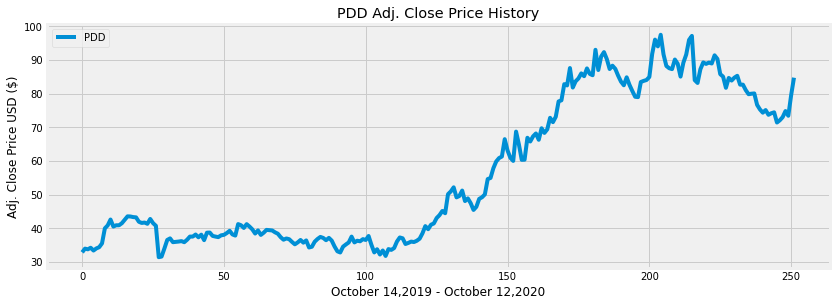

In [ ]:
#Visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(PDD['Adj Close'], label = 'PDD')
plt.title('PDD Adj. Close Price History')
plt.xlabel('October 14,2019 - October 12,2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
#Create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = PDD['Adj Close'].rolling(window = 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
247,81.412667
248,80.998000
249,80.470000
250,80.160667


In [ ]:
#Create a simple moving 100 day average
SMA100  = pd.DataFrame()
SMA100['Adj Close'] = PDD['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
247,81.0495
248,81.1845
249,81.2540
250,81.4185


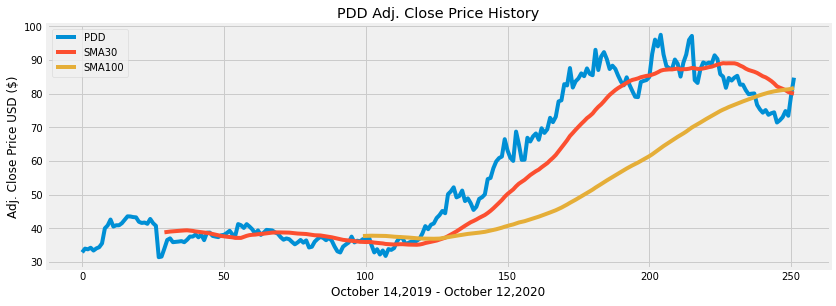

In [ ]:
#Visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(PDD['Adj Close'], label = 'PDD')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'],label = 'SMA100' )
plt.title('PDD Adj. Close Price History')
plt.xlabel('October 14,2019 - October 12,2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
#Create a new data frame to store all the data
data = pd.DataFrame()
data['PDD'] = PDD['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,PDD,SMA30,SMA100
0,32.840000,NaN,NaN
1,33.939999,NaN,NaN
2,33.740002,NaN,NaN
3,34.200001,NaN,NaN
4,33.380001,NaN,NaN
...,...,...,...
247,72.989998,81.412667,81.0495
248,74.800003,80.998000,81.1845
249,73.410004,80.470000,81.2540
250,79.540001,80.160667,81.4185


In [ ]:
#Crete a function to signal when to buy and sell the asset/stock
def buy_sell(data):
  sigPriceBuy = []
  sigPricesell = []
  flag = -1
  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['PDD'][i])
        sigPricesell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPricesell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPricesell.append(data['PDD'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPricesell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPricesell.append(np.nan)
  return (sigPriceBuy, sigPricesell)

In [ ]:
#Store the buy and sell data into a variale
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price']  = buy_sell[1]

data

,PDD,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,32.840000,NaN,NaN,NaN,NaN
1,33.939999,NaN,NaN,NaN,NaN
2,33.740002,NaN,NaN,NaN,NaN
3,34.200001,NaN,NaN,NaN,NaN
4,33.380001,NaN,NaN,NaN,NaN
...,...,...,...,...,...
247,72.989998,81.412667,81.0495,NaN,NaN
248,74.800003,80.998000,81.1845,NaN,74.800003
249,73.410004,80.470000,81.2540,NaN,NaN
250,79.540001,80.160667,81.4185,NaN,NaN


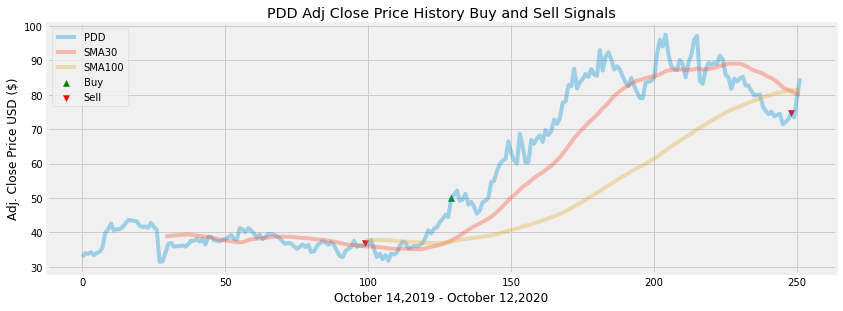

In [ ]:
#Visualize the data and strategy to buy and sell the stock
plt.figure(figsize=(12.6,4.6))
plt.plot(data['PDD'], label = 'PDD', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30',alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100',alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker='^', color = 'green' )
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('PDD Adj Close Price History Buy and Sell Signals')
plt.xlabel('October 14,2019 - October 12,2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()